# Práctico 2-3: Árboles de decisión


Estos modelos pueden verse como un juego de preguntas. Para clasificar un dato se realizan una serie de preguntas; la respuesta a cada pregunta determina una bifurcación en un árbol (la primera pregunta corresponde a la raíz del árbol). Una bifurcación puede llevar a otra bifurcación (otra pregunta), o puede ser suficiente para determinar la clase, en cuyo caso se llega a una _hoja_.

Existen diferentes métodos para determinar la secuencia de preguntas que constituye el proceso de clasificación en un modelo de este tipo. Abajo vemos cómo ajustar un árbol para clasificar flores de iris. Una ventaja de este tipo de modelos es que suelen ser fácilmente interpretables por un humano, lo que siempre es deseable.


### Preparación del entorno



# Preámbulo

*   Importamos los paquetes en el código (ya instalados anteriormente)
*   Configuramos algunos parámetros de visualización (tamaño de letra, gráficas, et.c)
*   Cargamos datos para experimentar

In [12]:

#
# importación
#
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as rng

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'






## Datos: valor de diamantes

Los árboles de decisión son particularmente útiles cuando las variables sobre las cuales debe decidirse incluyen datos _categóricos_, que no pueden considerarse numéricos y por ende no tiene sentido tomar como entrada en una regresión.

En este problema se busca predecir el precio de diamantes a partir de un conjunto de características.
Los datos los bajamos directamente de la red y los leemos como un archivo CSV.


In [13]:
import urllib
import csv

urllib.request.urlretrieve('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/diamond.csv', 'diamond.csv')
with open('diamond.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

header = data[0]
print(header)
y = np.array([float(row[-1]) for row in data[1:]]) # ultima columna es el precio
X_quilates = np.array([float(row[0]) for row in data[1:]]) # primera columna son los kilates; ya es un número
X_corte    = [row[1] for row in data[1:]] # segunda columna es el corte
X_color    = [row[2] for row in data[1:]] # tercera columna es el color
X_claridad = [row[3] for row in data[1:]] # cuarta columna es la claridad
X_pulido   = [row[4] for row in data[1:]] # quinta columna es el pulido
X_simetria = [row[5] for row in data[1:]] # sexta columna es la simetría
X_reporte  = [row[6] for row in data[1:]] # séptima columna es el reporte, que no tengo idea qué es
#
# categorías de cada columna
#
cortes     = np.unique(X_corte)
colores    = np.unique(X_color)
claridades = np.unique(X_claridad)
pulidos    = np.unique(X_pulido)
simetrias  = np.unique(X_simetria)
reportes   = np.unique(X_reporte)
#
# reemplazamos las categorías por números (índices) 
#
X_corte    = np.array([np.where(cortes == corte)[0][0] for corte in X_corte])
X_color    = np.array([np.where(colores == color)[0][0] for color in X_color])
X_claridad = np.array([np.where(claridades == claridad)[0][0] for claridad in X_claridad])
X_pulido   = np.array([np.where(pulidos == pulido)[0][0] for pulido in X_pulido])
X_simetria = np.array([np.where(simetrias == simetria)[0][0] for simetria in X_simetria])
X_reporte  = np.array([np.where(reportes == reporte)[0][0] for reporte in X_reporte])
X = np.concatenate([X_quilates[:, np.newaxis],
                    X_corte[:, np.newaxis], 
                    X_color[:, np.newaxis], 
                    X_claridad[:, np.newaxis], 
                    X_pulido[:, np.newaxis], 
                    X_simetria[:, np.newaxis], 
                    X_reporte[:, np.newaxis]], axis=1)
print(X.shape)
print(y.shape)




['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report', 'Price']
(6000, 7)
(6000,)


## Entrenamiento y validación

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#
# arboles de decisión
#
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42,max_depth=3)
model = clf.fit(X, y)
print(X.shape)
print(len(header))



(6000, 7)
8


## Evaluación


train rmse: 8157.04, mae: 5080.29, mape: 0.42
test rmse: 8640.42, mae: 5228.23, mape: 0.43


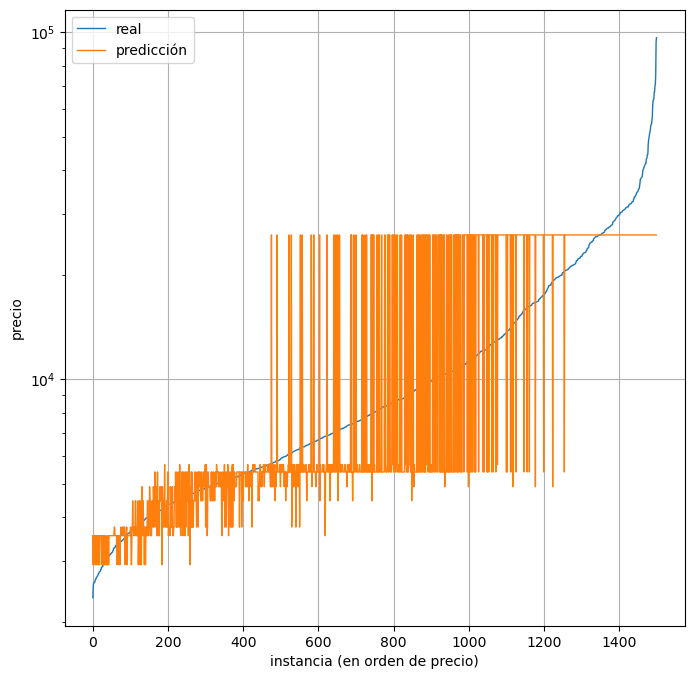

In [38]:

from sklearn import metrics

y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
#
# evaluamos distintas métricas de desempeño
#
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
mae = metrics.mean_absolute_error(y_train, y_train_pred)
mape = metrics.mean_absolute_percentage_error(y_train, y_train_pred)
print(f"train rmse: {rmse:.2f}, mae: {mae:.2f}, mape: {mape:.2f}")
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_test_pred)
print(f"test rmse: {rmse:.2f}, mae: {mae:.2f}, mape: {mape:.2f}")

idx = np.argsort(y_test)
y_test_sorted = y_test[idx]
y_test_pred_sorted = y_test_pred[idx]
plt.figure(figsize=(8,8))
plt.semilogy(y_test_sorted, label='real',lw=1)
plt.semilogy(y_test_pred_sorted, label='predicción',lw=1)
plt.grid()
plt.ylabel('precio')
plt.xlabel('instancia (en orden de precio)')
plt.legend()
plt.show()

### Observaciones

Como puede verse, el ajuste es bastante bueno. Como observación interesante, el modelo aprendido tiende a sub-valorar el precio real.
Esto lo podemos ver también en el histograma del error de predicción siguiente:

## Visualización

Hay varias formas de visualizar árboles. En orden de sofisticación:

* Funciones de Sklearn (ya seguramente instaladas en su entorno)
* Biblioteca `graphviz`
* `dtreeviz`

Veamos cada una de ellas. Como implican instalar paquetes es posible que algo falle, por lo que separamos las celdas según el tipo y ejecutamos las que podamos.



### SKlearn

La biblioteca Sklearn ya debe estar instalada en su sistema, ya que muchas de las funciones que usamos antes son de ahí.
Si bien el resultado no es muy bonito, siempre está disponible, lo cual no es menor.

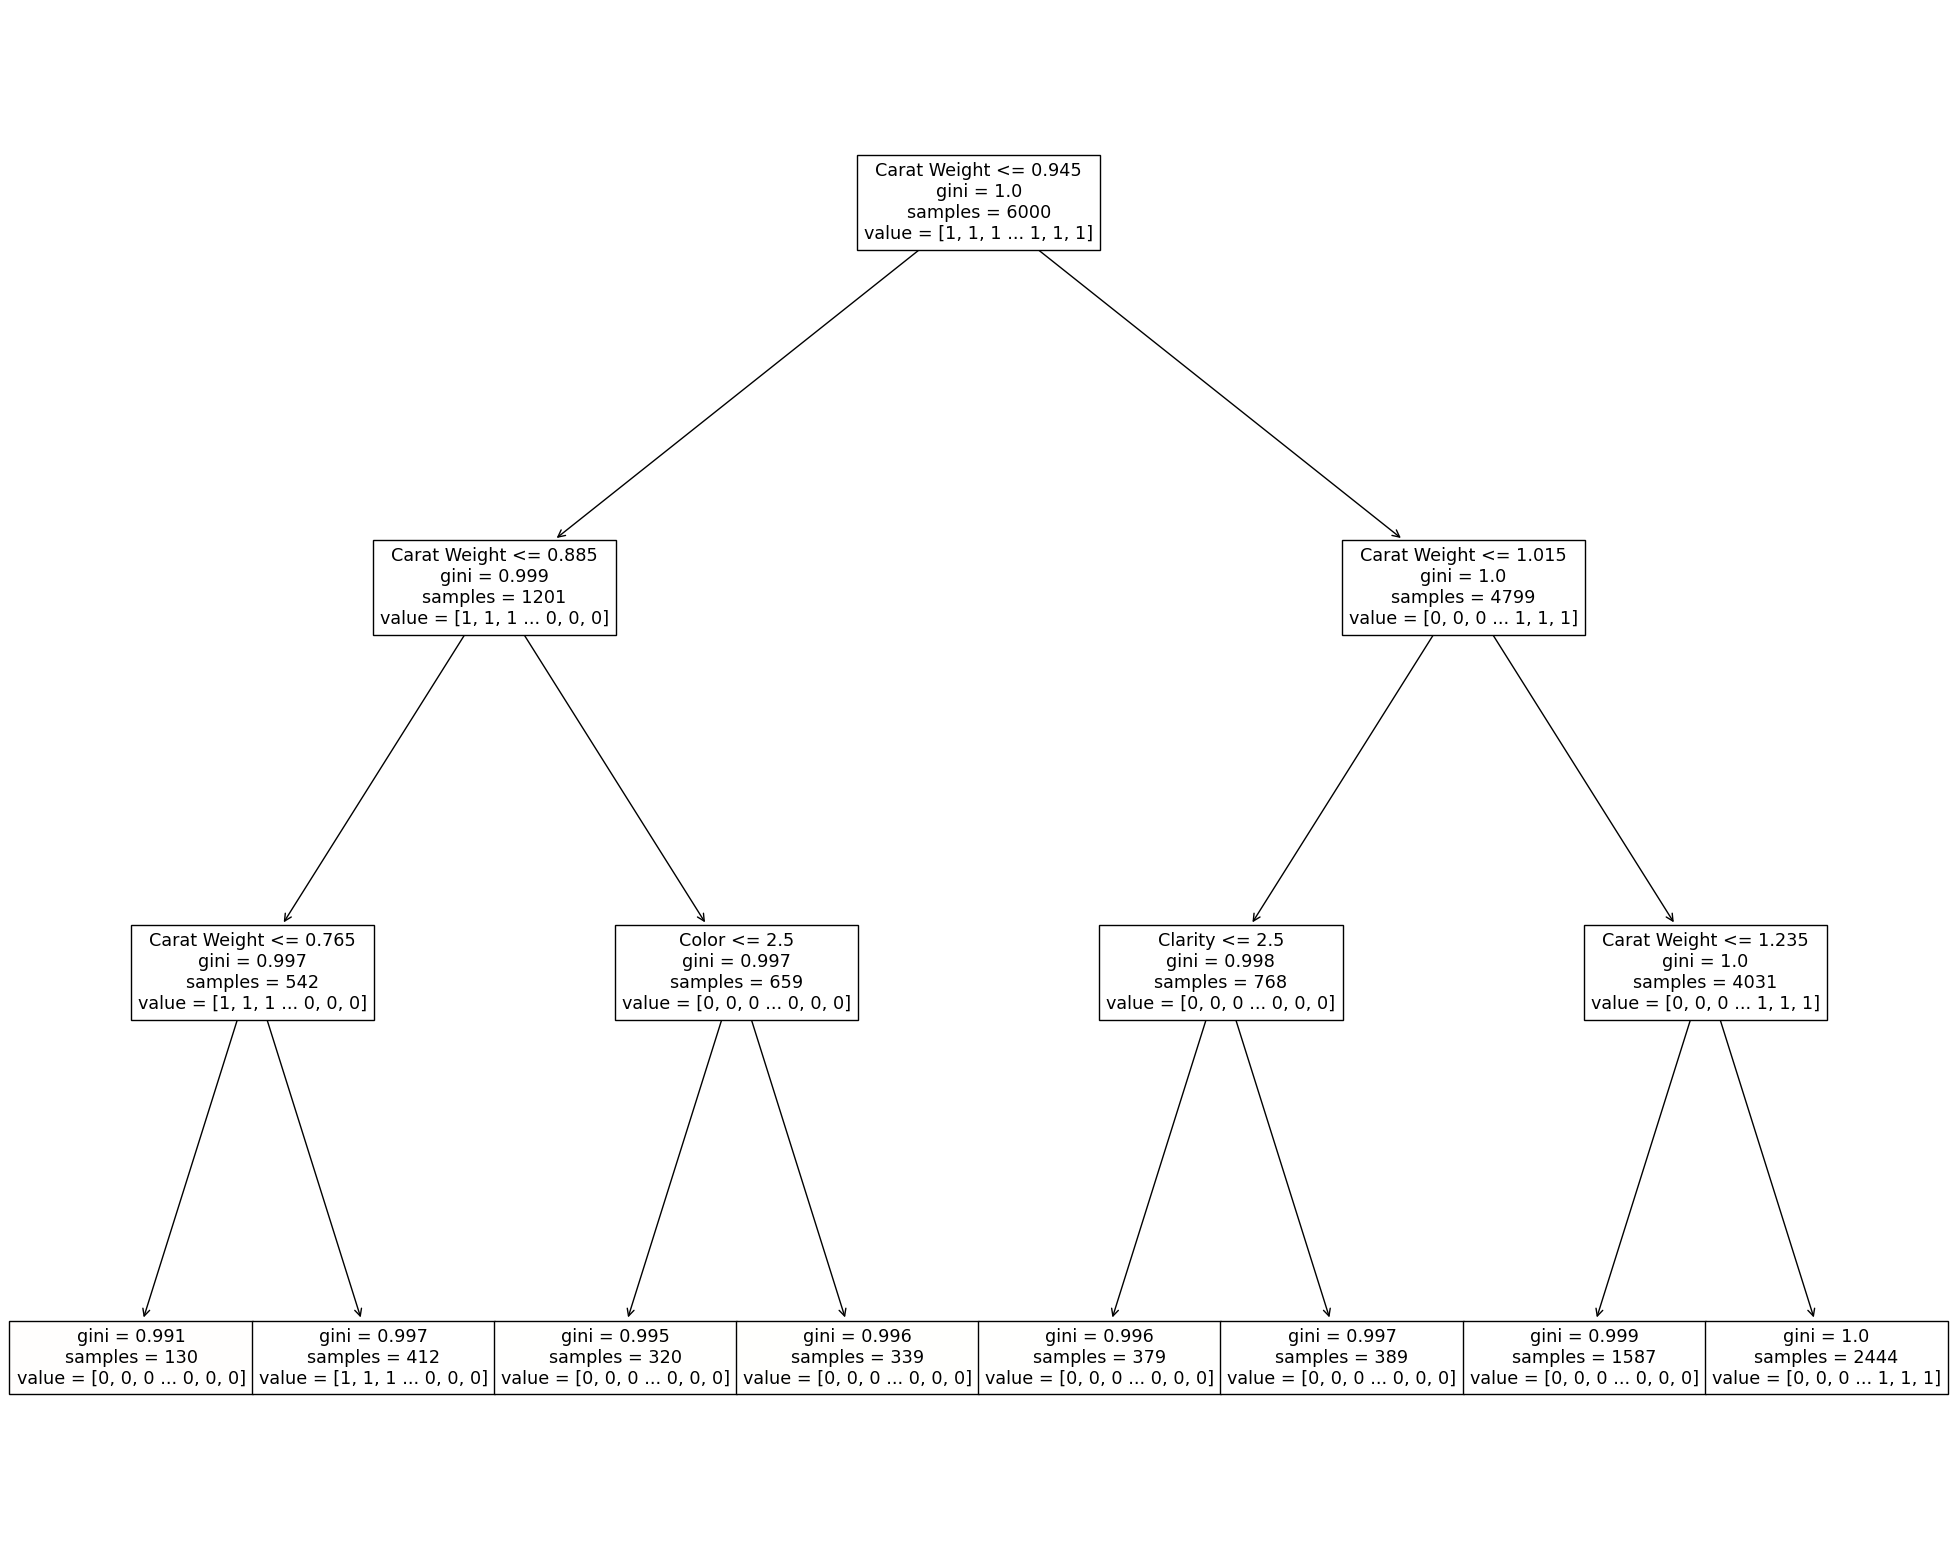

In [39]:
feature_names = header[:-1]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   filled=True)

fig.savefig("decistion_tree_sklearn.png")

#
# visualización con dtreeviz
#
# from dtreeviz.trees import dtreeviz # remember to load the package



### Graphviz

Graphviz es una biblioteca de dibujo muy completa y muy conocida para muchos tipos de datos.

In [41]:
!conda install -c conda-forge graphviz -y
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=headers[:-1],
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       hcb7b3dd_1         364 KB  conda-forge
    cairo-1.16.0               |       h302bd0f_5         1.0 MB
    expat-2.5.0                |       hb7217d7_1         115 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       h77eed37_3         1.5 MB  conda-forge
    fontconfig-2.14.2          |       h82840c6_0         232 KB  conda-forge
    fonts-cond

ModuleNotFoundError: No module named 'graphviz'

### Dtreeviz

Esta biblioteca es específica para dibujar árboles de decisión.

In [ ]:
#!pip install --quiet dtreeviz
!conda config --add channels defaults
!conda install -c defaults dtreeviz

import dtreeviz
from IPython.display import SVG

viz_model = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz = viz_model.view()     # render as SVG into internal object

viz.save("decision_tree_dtreeviz.svg")

SVG("decision_tree_dtreeviz.svg")